**K-NEAREST NEIGHBOURS**

1. Analyse the data using the visualizations

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('/content/sample_data/Zoo.csv')

In [4]:
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['number'])  # Select numerical columns only

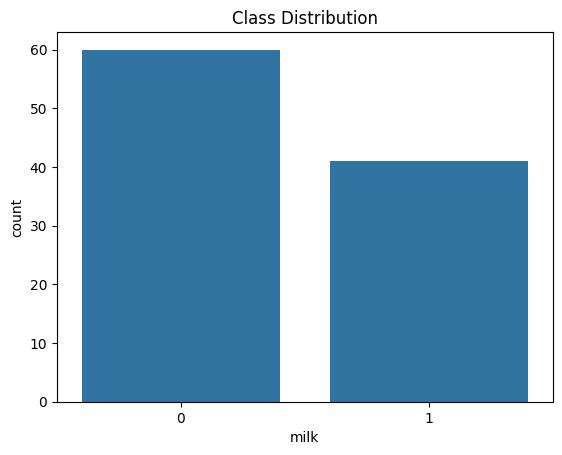

In [5]:
# Visualize the distribution of classes
sns.countplot(x='milk', data=df)
plt.title('Class Distribution')
plt.show()

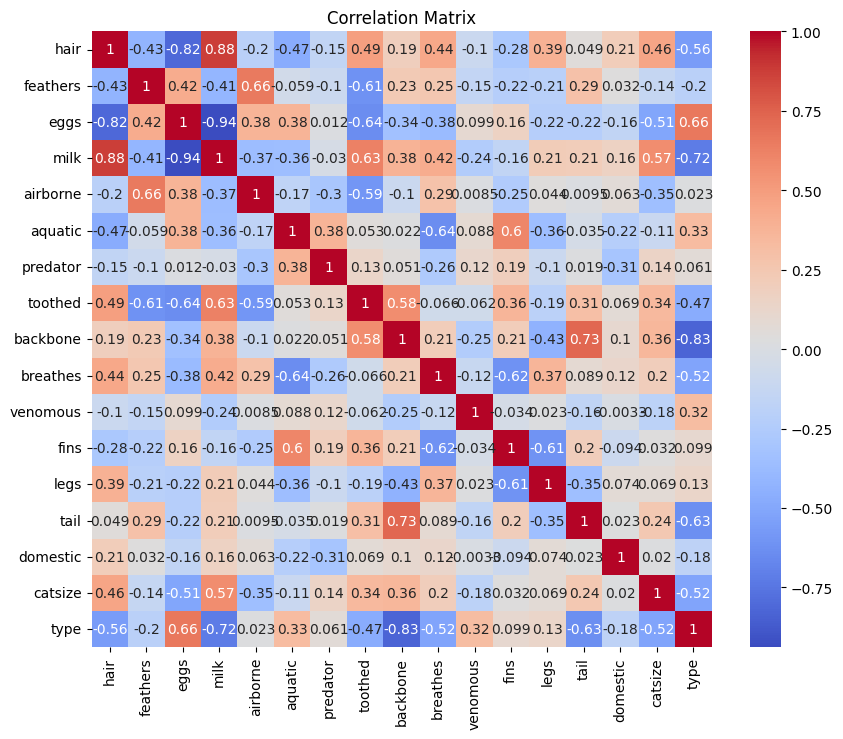

In [6]:
# Visualize the correlation matrix for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')  # Use numerical_df here
plt.title('Correlation Matrix')
plt.show()

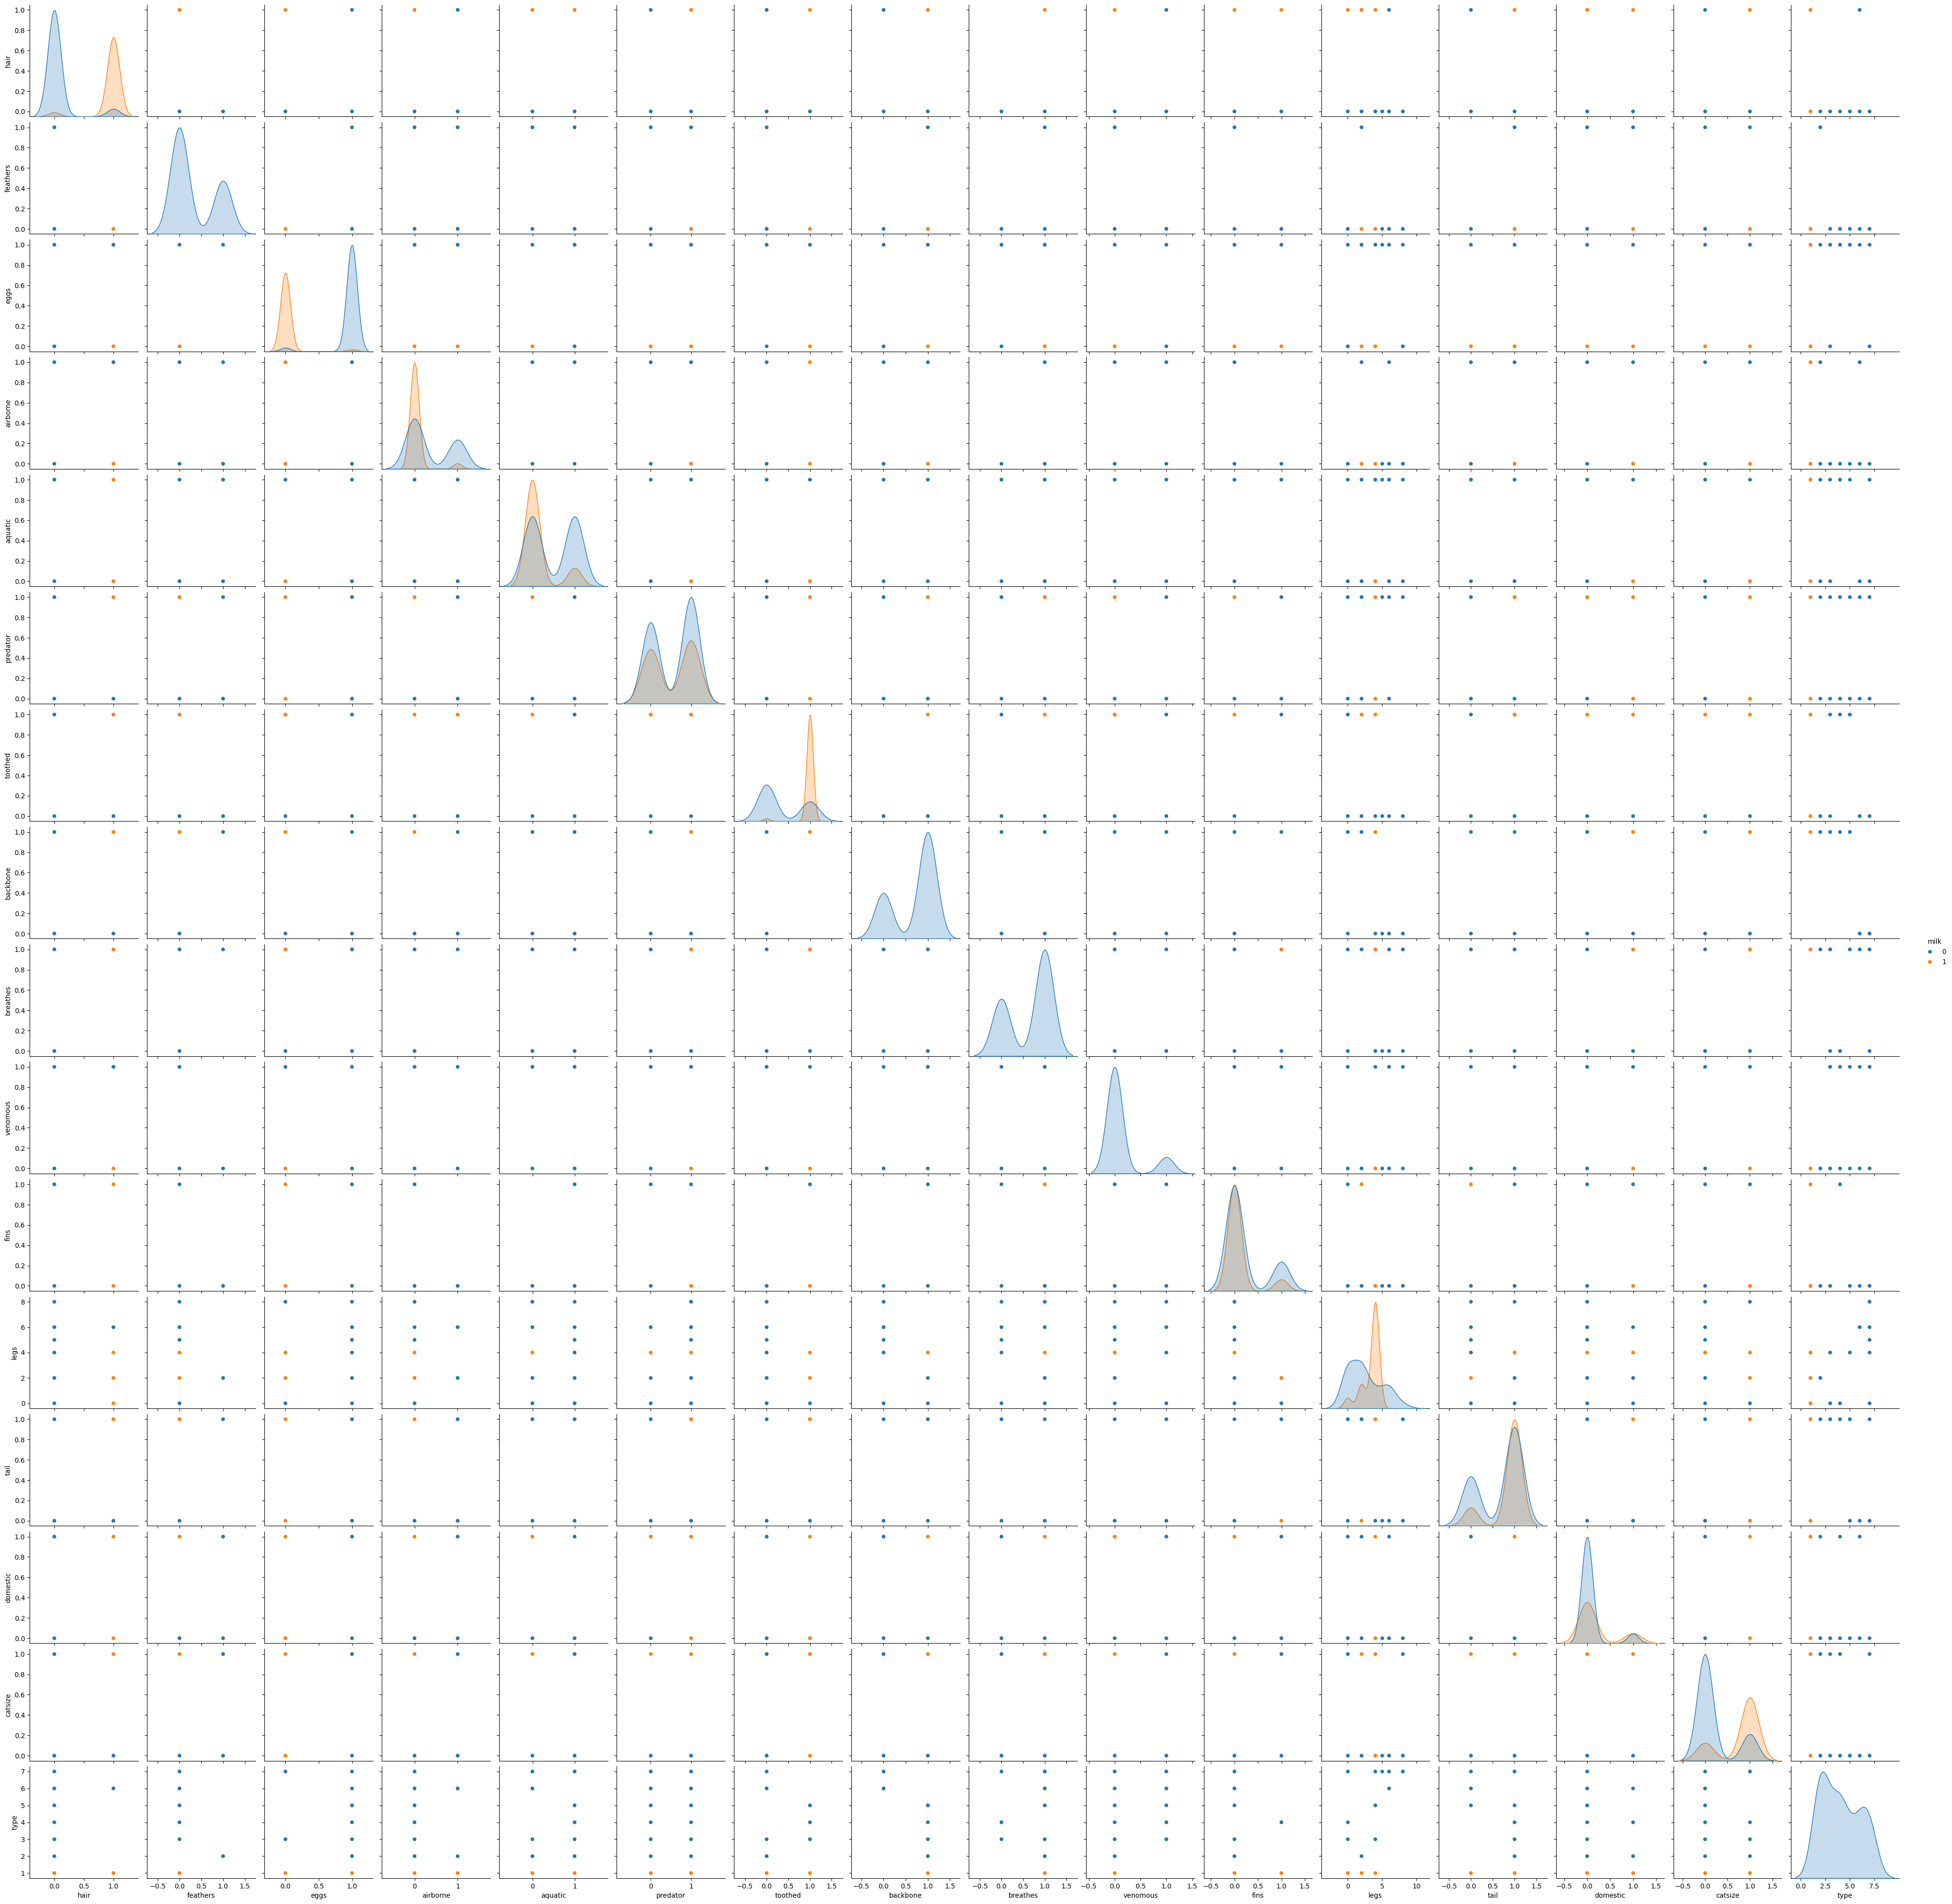

In [7]:
# Pairplot to see the relationships between features
# Consider selecting relevant numerical columns for pairplot
sns.pairplot(numerical_df, hue='milk')
plt.show()

2. Preprocess the data by handling missing values & Outliers, if any.

In [8]:
# Check for missing values
print(df.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [9]:
# Handle outliers (example using IQR for 'legs' column)
Q1 = df['legs'].quantile(0.25)
Q3 = df['legs'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['legs'] < (Q1 - 1.5 * IQR)) | (df['legs'] > (Q3 + 1.5 * IQR)))]

3. Split the dataset into training and testing sets (80% training, 20% testing).

In [10]:
from sklearn.model_selection import train_test_split
# Assuming 'class' is the target variable and the rest are features
X = df.drop('milk', axis=1)  # Features
y = df['milk']               # Target
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (79, 17)
X_test shape: (20, 17)
y_train shape: (79,)
y_test shape: (20,)


 4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [11]:
# Import necessary modules
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

# encode the categorical features
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), X_train.columns)]
)
# Create a pipeline with preprocessing and the KNN model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', KNeighborsClassifier(n_neighbors=3))])

# Train the model using the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  Index(['animal name', 'hair', 'feathers', 'eggs', 'airborne', 'aquatic',
       'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
       'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object'))])),
                ('model', KNeighborsClassifier(n_neighbors=3))])


5. Choose an appropriate distance metric and value for K.


In [12]:
from sklearn.model_selection import GridSearchCV
# Select only numeric columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
X_train_numeric = X_train[numeric_cols]

# Create a pipeline with just the KNN model (no preprocessing needed for numeric data)
pipeline = Pipeline(steps=[('model', KNeighborsClassifier())])

# Define the parameter grid
param_grid = {
    'model__n_neighbors': [3, 5, 7],
    'model__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_numeric, y_train)  # Fit on numeric data only

# Output the best parameters
best_k = grid_search.best_params_['model__n_neighbors']
best_metric = grid_search.best_params_['model__metric']
print(f"Best K: {best_k}")
print(f"Best Distance Metric: {best_metric}")


Best K: 5
Best Distance Metric: euclidean


6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Before predicting, select only the numeric columns from X_test as well
X_test_numeric = X_test[numeric_cols]
# Predict on the test set (using the numeric data only)
y_pred = grid_search.predict(X_test_numeric)
# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


7. Visualize the decision boundaries of the classifier.


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Inspect column names to select features and target
print(df.columns)

# Select two features and target based on the inspection
X = df[['hair', 'feathers']]  # Replace with actual feature names
y = df['domestic']  # Replace with actual target column name

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the DecisionTreeClassifier
clf = DecisionTreeClassifier()  # Initialize the classifier
clf.fit(X_train, y_train)  # Train the classifier

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


DecisionTreeClassifier()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


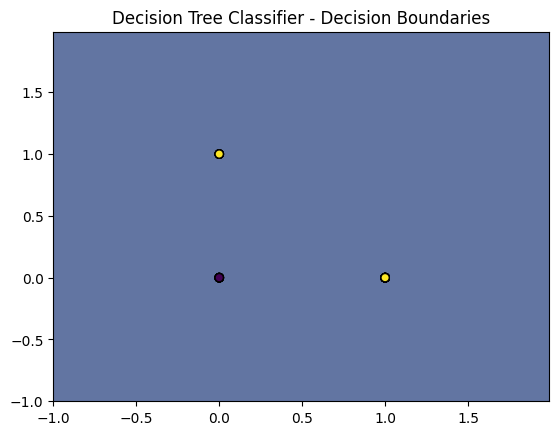

In [15]:
# Visualize decision boundaries
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # Now you can use clf to predict
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, edgecolor='k', marker='o')
plt.title('Decision Tree Classifier - Decision Boundaries')
plt.show()

# **Interview Questions:**



1**. What are the key hyperparameters in KNN?**
- ANSWER: The key hyperparameters in K-Nearest Neighbors (KNN) are:

 - I. n_neighbors: The number of neighbors to consider when making a prediction. This is the most critical hyperparameter and directly influences the model's performance.
 - II. weights: Determines how the distance between points influences the prediction. It can be set to 'uniform' (all neighbors contribute equally) or 'distance' (closer neighbors have more influence).
 - III. metric: The distance metric used to calculate the distance between points, with common choices being 'euclidean', 'manhattan', and 'minkowski'. The choice of metric can affect the model's accuracy depending on the data's nature.

**2. What distance metrics can be used in KNN?**

 ANSWER: -In K-Nearest Neighbors (KNN), several distance metrics can be used to measure the distance between data points:

 - 1.Euclidean Distance: The most common metric, which calculates the straight-line distance between two points in Euclidean space.
 -2.Manhattan Distance: Measures distance based on the sum of the absolute differences between the coordinates, often used in grid-like patterns.
 -3.Minkowski Distance: A generalization of both Euclidean and Manhattan distances, where the order parameter P defines the type of distance.
 -4.Chebyshev Distance: Measures the maximum absolute difference between the coordinates of two points.
 -5.Hamming Distance: Used for categorical variables, it counts the number of positions at which the corresponding elements differ.